In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import pandas_read_xml as pdx


In [2]:
file_path = '/Users/rashidalawadhi/Documents/GitHub/data_analysis/hygiene_ratings/hygiene_data/'

In [3]:
files = os.listdir(file_path)
print(len(files))
files.sort()
files.remove('.DS_Store')
files

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rashidalawadhi/Documents/GitHub/data_analysis/hygiene_ratings/hygiene_data/'

In [4]:
# # Reading the first file
# file_path_file1 = os.path.join(file_path, 'cityoflondon.xml')
# tree = ET.parse(file_path_file1)
# root = tree.getroot()
# print(root.tag, root.attrib)

In [5]:
def create_df(path ):
    df = pdx.read_xml(path)
    df = pdx.fully_flatten(df)
    df = df[['FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName',  'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Scores|Hygiene']]
    df = df.rename(columns={'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName': 'name', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType': 'type', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue': 'rating','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Scores|Hygiene' : 'hygiene' })
    df = df.drop(df[(df['rating'] == 'Exempt') | (df['rating'] == 'AwaitingInspection')].index)
    df = df.dropna().reset_index(drop=True)
    df = df.astype({'rating':int, 'hygiene':int})
    
    return df


In [6]:
# df = create_df('/Users/rashidalawadhi/Documents/GitHub/data_analysis/hygiene_ratings/hygiene_data/richmond.xml')

In [7]:
# sn.displot(data=df, x='rating')
# plt.show()


In [8]:
#calculates the percentage of businesses with a particular rating.
def rating_percentage(num, df, column):
    tot = 0
    for i in df[column]:
        if i == num:
            tot+=1

    
    tot_norm = tot/len(df[column])*100
    return round(tot_norm)

In [9]:
a = []
for i in files:
    l_df = create_df('hygiene_ratings/hygiene_data/'+i)
    a.append([i.replace('.xml',''),rating_percentage(5, l_df, 'rating'),rating_percentage(4, l_df, 'rating'),rating_percentage(3, l_df, 'rating'),rating_percentage(2, l_df, 'rating'),rating_percentage(1, l_df, 'rating'),rating_percentage(0, l_df, 'rating')])
    

In [10]:
borough_df = pd.DataFrame(a)
borough_df = borough_df.rename(columns={0:'borough', 1:'5_rating', 2:'4_rating', 3:'3_rating', 4:'2_rating', 5:'1_rating', 6:'0_rating'})

In [45]:
borough_df.loc[borough_df['5_rating']>=70]

,borough,5_rating,4_rating,3_rating,2_rating,1_rating,0_rating
2,bexley,72,16,8,2,2,0
4,bromley,73,14,10,1,2,0
6,cityoflondon,87,8,2,2,1,0
10,greenwich,77,17,4,1,1,0
12,haringey,76,14,6,3,1,1
15,hillington,70,17,8,2,3,1
16,hounslow,71,20,6,2,1,0
17,hs_fulham,76,15,7,1,1,0
19,kensington_chelsea,86,8,4,1,0,0
23,merton,76,14,8,1,1,0


<Figure size 1000x1000 with 0 Axes>

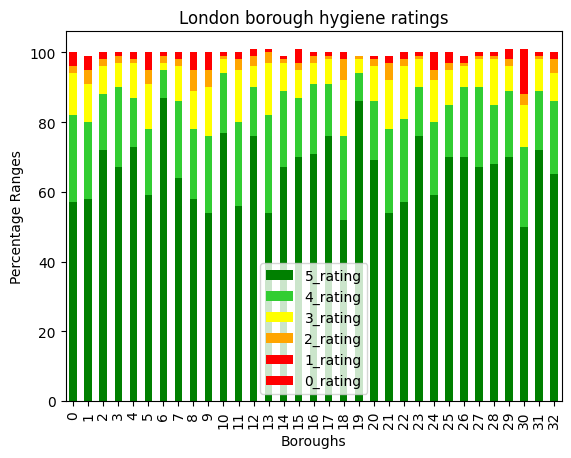

In [43]:
plt.figure(figsize=(10,10))

borough_df.plot(kind='bar', stacked=True, color=['green', 'limegreen', 'yellow','orange', 'red', 'red'])
 
# Add Title and Labels

plt.title('London borough hygiene ratings')
plt.xlabel('Boroughs')
plt.ylabel('Percentage Ranges')
plt.savefig('hygiene_london')
plt.show()

In [13]:
borough_df['borough'][18]

'islington'

In [14]:
geo_df = pdx.read_xml('hygiene_ratings/hygiene_data/barnet.xml')

In [15]:
pdx.fully_flatten(geo_df)['FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue'][2453]

'Exempt'

In [19]:
def create_geo_df(path ):
    df = pdx.read_xml(path)
    df = pdx.fully_flatten(df)
    df = df[['FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName',  'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Latitude', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Longitude' ]]
    df = df.rename(columns={'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName': 'name', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType': 'type', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue': 'rating', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Latitude' : 'latitude', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Longitude':'longitude' })
    df = df.drop(df[(df['rating'] == 'Exempt') | (df['rating'] == 'AwaitingInspection') | (df['rating'] == 'AwaitingPublication')].index)
    df = df.dropna().reset_index(drop=True)
    df = df.astype({'rating':int, 'latitude':float, 'longitude':float})
    
    return df

In [20]:
# for i in files:
#     df_geo = create_geo_df('hygiene_ratings/hygiene_data/'+i)
#     j = i.replace('.xml','.xlsx')
#     path = '/Users/rashidalawadhi/Documents/GitHub/data_analysis/excel_sheets/'+j
#     df_geo.to_excel(path)



In [23]:
#Creates a pandas dataframe which includes geolocation for the whole of london

# tot_df_geo = create_geo_df('hygiene_ratings/hygiene_data/'+'barking_dagenham.xml')
# for i in files:
#     if i != 'barking_dagenham.xml':
#         df_geo = create_geo_df('hygiene_ratings/hygiene_data/'+i)
#         tot_df_geo = pd.concat([tot_df_geo, df_geo], ignore_index=True)



In [25]:
# tot_df_geo.to_excel('/Users/rashidalawadhi/Documents/GitHub/data_analysis/excel_sheets/total_data.xlsx')

In [26]:
# tot_df_geo.to_csv('/Users/rashidalawadhi/Documents/GitHub/data_analysis/excel_sheets/total_data.csv')

In [ ]:
#29/05/2023

In [13]:
df = pd.read_csv('/Users/rashidalawadhi/Documents/GitHub/data_analysis/london-hygiene-rating/excel_sheets/total_data.csv', index_col=0)

In [14]:
df

,name,type,rating,latitude,longitude
0,1st Steps Day Nursery LTD,Hospitals/Childcare/Caring Premises,4,51.551758,0.161440
1,212 Lounge,Other catering premises,4,51.572008,0.141134
2,3 Sweet Mrs,Retailers - other,4,51.539736,0.160559
3,3D Food & Wine LTD T/A Westbury News,Retailers - other,4,51.534083,0.085834
4,5 Elm's Cafe,Restaurant/Cafe/Canteen,3,51.554493,0.142421
...,...,...,...,...,...
57240,Umu Restaurant,Restaurant/Cafe/Canteen,4,51.511424,-0.144396
57241,Vespa Italian Restaurant,Restaurant/Cafe/Canteen,4,51.510042,-0.128772
57242,Visconti Of Westminster Restaurant,Restaurant/Cafe/Canteen,5,51.493594,-0.129274
57243,Whole Foods Market,Retailers - other,5,51.510425,-0.135598


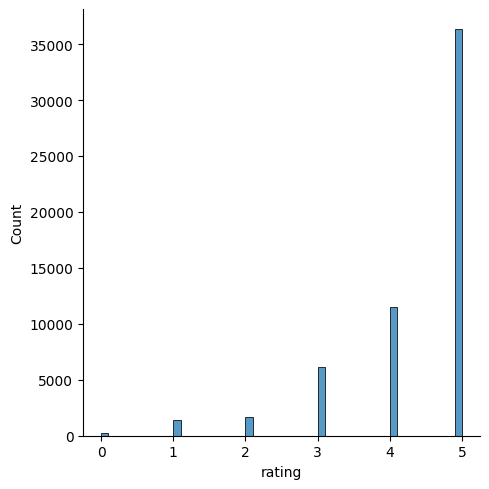

In [27]:
sn.displot(data=df, x='rating', binwidth=0.1)